# Data Exploration for Falklands Rotors data

A good place to start any machine learning project is to really understand the data you will be using to train your models, both through calculating statistics

In [1]:
import pathlib
import datetime
import os

In [2]:
import pandas

In [3]:
import iris

In [4]:
import matplotlib

In [5]:
import sklearn
import sklearn.metrics

In [6]:
%matplotlib inline

In [7]:
try:
    root_data_dir = os.environ['OPMET_ROTORS_DATA_ROOT']
except KeyError:
    root_data_dir = '/data/users/shaddad/ds_cop/2021_opmet_challenge/ML'
root_data_dir = pathlib.Path(root_data_dir)
print(root_data_dir)

/Users/stephen.haddad/data/ml_challenges


## Exploring Falklands Rotor Data

In [8]:
falklands_data_path = root_data_dir.joinpath( 'Rotors')
falklands_data_path

PosixPath('/Users/stephen.haddad/data/ml_challenges/Rotors')

In [9]:
falklands_new_training_data_path = pathlib.Path(falklands_data_path, 'new_training.csv')

In [10]:
falklands_training_df = pandas.read_csv(falklands_new_training_data_path)

In [11]:
falklands_training_df = falklands_training_df.rename({'Rotors 1 is true': 'rotors'},axis=1)

In [12]:
falklands_training_df.loc[falklands_training_df[falklands_training_df['rotors'].isna()].index, 'rotors'] = 0

In [13]:
falklands_training_df['DTG'] = pandas.to_datetime(falklands_training_df['DTG'])

In [14]:
falklands_training_df = falklands_training_df.drop_duplicates(subset=['DTG'])

In [15]:
falklands_training_df

,DTG,air_temp_obs,dewpoint_obs,wind_direction_obs,wind_speed_obs,wind_gust_obs,air_temp_1,air_temp_2,air_temp_3,air_temp_4,...,windspd_18,winddir_19,windspd_19,winddir_20,windspd_20,winddir_21,windspd_21,winddir_22,windspd_22,rotors
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2015-01-01 00:00:00,283.9,280.7,110.0,4.1,-9999999.0,284.000,283.625,283.250,282.625,...,5.8,341.0,6.0,334.0,6.1,330.0,6.0,329.0,5.8,0.0
2,2015-01-01 03:00:00,280.7,279.7,90.0,7.7,-9999999.0,281.500,281.250,280.750,280.250,...,6.8,344.0,5.3,348.0,3.8,360.0,3.2,12.0,3.5,0.0
3,2015-01-01 06:00:00,279.8,278.1,100.0,7.7,-9999999.0,279.875,279.625,279.125,278.625,...,6.0,345.0,5.5,358.0,5.0,10.0,4.2,38.0,4.0,0.0
4,2015-01-01 09:00:00,279.9,277.0,120.0,7.2,-9999999.0,279.625,279.250,278.875,278.250,...,3.1,338.0,3.5,354.0,3.9,9.0,4.4,22.0,4.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20101,2020-12-31 06:00:00,276.7,275.5,270.0,3.6,-9999999.0,277.875,277.750,277.625,277.500,...,12.1,223.0,11.8,221.0,11.4,219.0,11.3,215.0,11.4,0.0
20102,2020-12-31 09:00:00,277.9,276.9,270.0,3.1,-9999999.0,277.875,277.625,277.875,277.875,...,10.2,230.0,10.8,230.0,11.6,227.0,12.3,222.0,12.0,0.0
20103,2020-12-31 12:00:00,283.5,277.1,220.0,3.6,-9999999.0,281.125,280.625,280.125,279.625,...,10.3,218.0,11.9,221.0,12.8,222.0,11.9,225.0,10.6,0.0
20104,2020-12-31 15:00:00,286.1,276.9,250.0,3.6,-9999999.0,284.625,284.125,283.625,283.000,...,9.4,218.0,8.6,212.0,8.3,218.0,8.7,226.0,10.1,0.0


In [16]:
falklands_training_df['rotors'].value_counts()

0.0    17059
1.0      449
Name: rotors, dtype: int64

In [17]:
falklands_training_df.columns

Index(['DTG', 'air_temp_obs', 'dewpoint_obs', 'wind_direction_obs',
       'wind_speed_obs', 'wind_gust_obs', 'air_temp_1', 'air_temp_2',
       'air_temp_3', 'air_temp_4', 'air_temp_5', 'air_temp_6', 'air_temp_7',
       'air_temp_8', 'air_temp_9', 'air_temp_10', 'air_temp_11', 'air_temp_12',
       'air_temp_13', 'air_temp_14', 'air_temp_15', 'air_temp_16',
       'air_temp_17', 'air_temp_18', 'air_temp_19', 'air_temp_20',
       'air_temp_21', 'air_temp_22', 'sh_1', 'sh_2', 'sh_3', 'sh_4', 'sh_5',
       'sh_6', 'sh_7', 'sh_8', 'sh_9', 'sh_10', 'sh_11', 'sh_12', 'sh_13',
       'sh_14', 'sh_15', 'sh_16', 'sh_17', 'sh_18', 'sh_19', 'sh_20', 'sh_21',
       'sh_22', 'winddir_1', 'windspd_1', 'winddir_2', 'windspd_2',
       'winddir_3', 'windspd_3', 'winddir_4', 'windspd_4', 'winddir_5',
       'windspd_5', 'winddir_6', 'windspd_6', 'winddir_7', 'windspd_7',
       'winddir_8', 'windspd_8', 'winddir_9', 'windspd_9', 'winddir_10',
       'windspd_10', 'winddir_11', 'windspd_11', 'windd

In [18]:
falklands_training_df = falklands_training_df[falklands_training_df['wind_speed_obs'] >= 0]

In [19]:
no_rotors_df = falklands_training_df[falklands_training_df['rotors'] == 0]
rotors_present_df = falklands_training_df[falklands_training_df['rotors'] == 1]

In [20]:
no_rotors_df = falklands_training_df[falklands_training_df['rotors'] == 0]
rotors_present_df = falklands_training_df[falklands_training_df['rotors'] == 1]

Text(0.5, 0, 'wind direction')

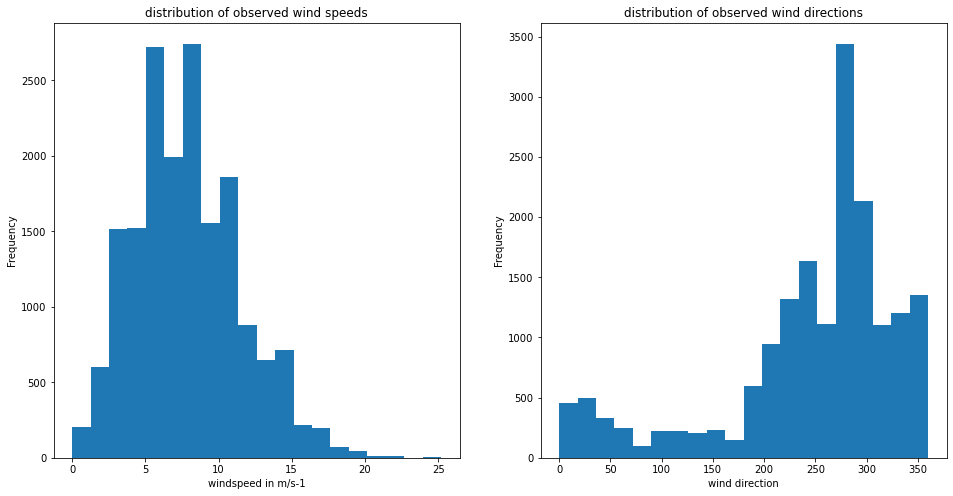

In [21]:
fig1 = matplotlib.pyplot.figure('distribution_wind_spevalue_countsirection', figsize=(16,8))
ax1 = fig1.add_subplot(1,2,1,title='distribution of observed wind speeds')
falklands_training_df['wind_speed_obs'].plot.hist(ax=ax1,bins=20)
ax1.set_xlabel('windspeed in m/s-1',)
ax1 = fig1.add_subplot(1,2,2,title='distribution of observed wind directions')
falklands_training_df['wind_direction_obs'].plot.hist(ax=ax1,bins=20)
ax1.set_xlabel('wind direction',)

['air_temp_obs', 'dewpoint_obs', 'wind_direction_obs', 'wind_speed_obs', 'wind_gust_obs']


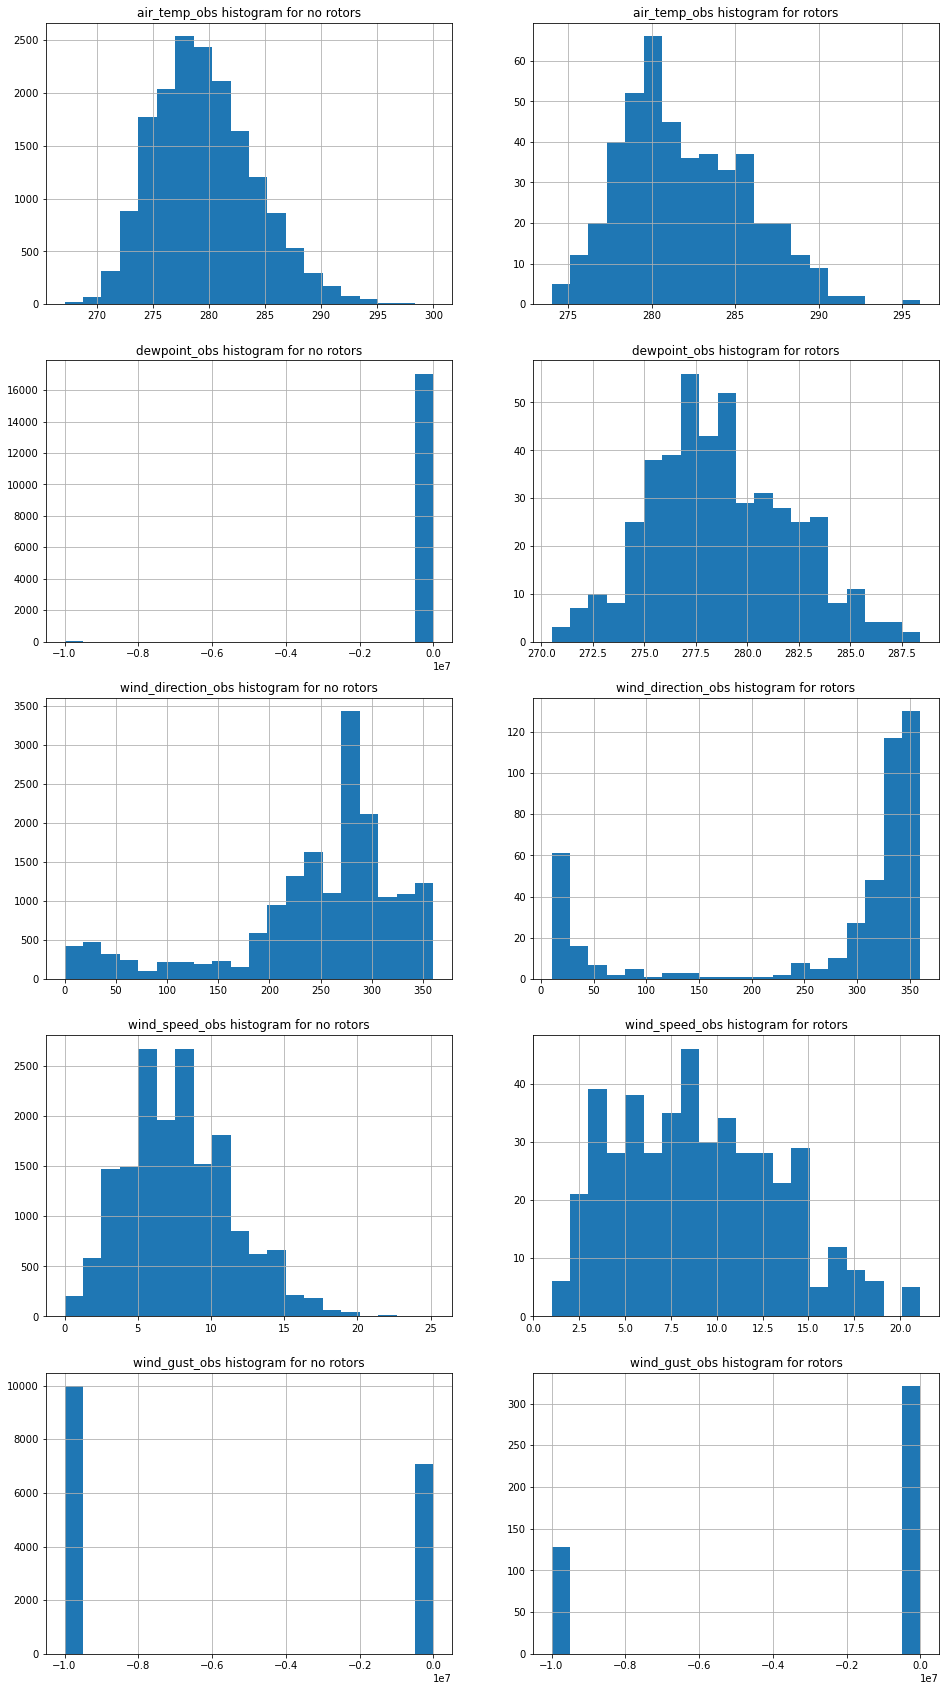

In [22]:
vars_to_plot = ['air_temp_obs', 'dewpoint_obs', 'wind_direction_obs', 'wind_speed_obs', 'wind_gust_obs',]
print(vars_to_plot)
fig1 = matplotlib.pyplot.figure('comparing rota events',figsize=(16,6*len(vars_to_plot)))
for ix1, var_name in enumerate(vars_to_plot):
    ax1 = fig1.add_subplot(len(vars_to_plot),2,ix1*2+1, title=f'{var_name} histogram for no rotors')
    falklands_training_df[falklands_training_df['rotors'] == 0][var_name].hist(bins=20,ax=ax1)
    ax1 = fig1.add_subplot(len(vars_to_plot),2,ix1*2+2, title=f'{var_name} histogram for rotors')
    falklands_training_df[falklands_training_df['rotors'] == 1][var_name].hist(bins=20,ax=ax1)


In [23]:
windspeed_columns = [f'windspd_{ix1}' for ix1 in range(1,21) ]
humidity_columns = [f'sh_{ix1}' for ix1 in range(1,21) ]
wind_dir_columns = [f'winddir_{ix1}' for ix1 in range(1,21) ]
temperature_columns = [f'air_temp_{ix1}' for ix1 in range(1,21) ]


<AxesSubplot:xlabel='DTG,rotors'>

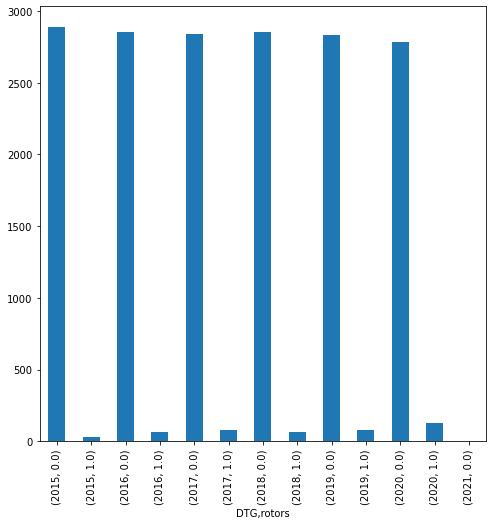

In [24]:
falklands_training_df.groupby([ falklands_training_df['DTG'].apply(lambda x: x.year), falklands_training_df['rotors']])['DTG'].count().plot.bar(figsize=(8,8))

<AxesSubplot:xlabel='DTG'>

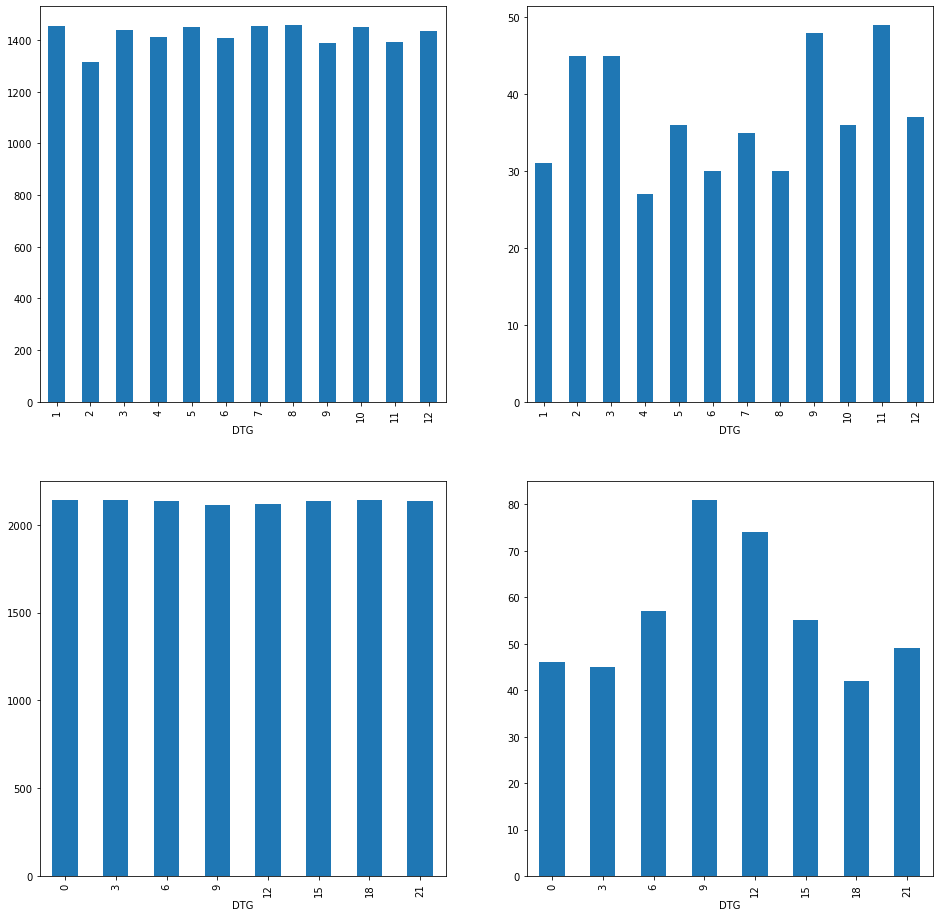

In [25]:
fig1 = matplotlib.pyplot.figure('time of year',figsize=(16,16))
ax1 = fig1.add_subplot(2,2,1) 
no_rotors_df.groupby([ no_rotors_df['DTG'].apply(lambda x: x.month)])['DTG'].count().plot.bar( ax=ax1)
ax1 = fig1.add_subplot(2,2,2) 
rotors_present_df.groupby([ rotors_present_df['DTG'].apply(lambda x: x.month)])['DTG'].count().plot.bar(ax=ax1)

ax1 = fig1.add_subplot(2,2,3) 
no_rotors_df.groupby([ no_rotors_df['DTG'].apply(lambda x: x.hour)])['DTG'].count().plot.bar( ax=ax1)
ax1 = fig1.add_subplot(2,2,4) 
rotors_present_df.groupby([ rotors_present_df['DTG'].apply(lambda x: x.hour)])['DTG'].count().plot.bar(ax=ax1)

## Exploring OpMet results

We have a spreadsheet which logs when OpMets forecast a rotor event compared with one happened. We will explore what this data looks like here so that we can use it compare the performance of the ML models we train with human forecaster performance.

In [26]:
opmet_results_path = falklands_data_path.joinpath('rotors_opmet_performance_2016_2021.csv')
opmet_results_path

PosixPath('/Users/stephen.haddad/data/ml_challenges/Rotors/rotors_opmet_performance_2016_2021.csv')

In [27]:
opmet_results_df = pandas.read_csv(opmet_results_path)
opmet_results_df

,DTG,observation,opmet_forecast,Hit,False Positive,True Negative,Miss
0,19/09/2016 00:00,NaN,NaN,False,False,True,False
1,19/09/2016 01:00,NaN,NaN,False,False,True,False
2,19/09/2016 02:00,NaN,NaN,False,False,True,False
3,19/09/2016 03:00,NaN,NaN,False,False,True,False
4,19/09/2016 04:00,NaN,NaN,False,False,True,False
...,...,...,...,...,...,...,...
38971,28/02/2021 19:00,NaN,1.0,False,True,False,False
38972,28/02/2021 20:00,NaN,1.0,False,True,False,False
38973,28/02/2021 21:00,NaN,NaN,False,False,True,False
38974,28/02/2021 22:00,NaN,NaN,False,False,True,False


In [28]:
opmet_results_df.loc[opmet_results_df[opmet_results_df.observation.isna()].index,'observation'] = 0.0

In [29]:
opmet_results_df.loc[opmet_results_df[opmet_results_df['opmet_forecast'].isna()].index,'opmet_forecast'] = 0.0

In [30]:
opmet_results_df['DTG'] = pandas.to_datetime(opmet_results_df['DTG'])

In [31]:
opmet_results_df

,DTG,observation,opmet_forecast,Hit,False Positive,True Negative,Miss
0,2016-09-19 00:00:00,0.0,0.0,False,False,True,False
1,2016-09-19 01:00:00,0.0,0.0,False,False,True,False
2,2016-09-19 02:00:00,0.0,0.0,False,False,True,False
3,2016-09-19 03:00:00,0.0,0.0,False,False,True,False
4,2016-09-19 04:00:00,0.0,0.0,False,False,True,False
...,...,...,...,...,...,...,...
38971,2021-02-28 19:00:00,0.0,1.0,False,True,False,False
38972,2021-02-28 20:00:00,0.0,1.0,False,True,False,False
38973,2021-02-28 21:00:00,0.0,0.0,False,False,True,False
38974,2021-02-28 22:00:00,0.0,0.0,False,False,True,False


In [32]:
merged_df = falklands_training_df.merge(opmet_results_df,on='DTG')

In [33]:
opmet_results_df['truePositive'] = ((opmet_results_df['observation'] == 1 ) & (opmet_results_df['opmet_forecast'] ==1))
opmet_results_df['falsePositive']  = ((opmet_results_df['observation'] == 0 ) & (opmet_results_df['opmet_forecast'] ==1))
opmet_results_df['trueNegative'] = ((opmet_results_df['observation'] == 0 ) & (opmet_results_df['opmet_forecast'] ==0))
opmet_results_df['falseNegative']  = ((opmet_results_df['observation'] == 1 ) & (opmet_results_df['opmet_forecast'] ==0))


In [34]:
opmet_results_df['result_category'] = 'trueNegative'
opmet_results_df.loc[opmet_results_df[opmet_results_df['falseNegative']==True].index,'result_category'] = 'falseNegative'
opmet_results_df.loc[opmet_results_df[opmet_results_df['falsePositive']==True].index,'result_category'] = 'falsePositive'
opmet_results_df.loc[opmet_results_df[opmet_results_df['truePositive']==True].index,'result_category'] = 'truePositive'

<AxesSubplot:title={'center':'true/false positive/negative proportions'}, ylabel='result_category'>

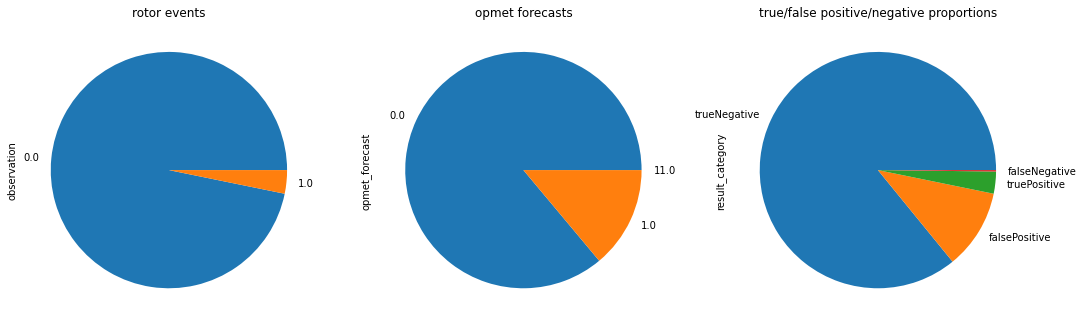

In [35]:
fig1 = matplotlib.pyplot.figure('comparisonn of hits/isses/etc.')
ax1 = fig1.add_subplot(1,3,1,title='rotor events')
opmet_results_df['observation'].value_counts().plot.pie(figsize=(18,6))
ax1 = fig1.add_subplot(1,3,2,title='opmet forecasts')
opmet_results_df['opmet_forecast'].value_counts().plot.pie(figsize=(18,6))
ax1 = fig1.add_subplot(1,3,3,title='true/false positive/negative proportions')
opmet_results_df['result_category'].value_counts().plot.pie(figsize=(18,6))


We see that OpMets forecast a greater proprtion of rotrs events than are actually observed. This is what we would expect as the highest "cost" category is false negatives or misses, as this will result in aircraft trying to land and having to be diverted or fly back to their origin. So forecasters want to err on the side of predicting rotors that don't don't happen. As expected, we see a very small proption of false negatives and a significant proprotion of false positives.

In [36]:
precision_opmet = sklearn.metrics.precision_score(
    opmet_results_df['observation'].values,
    opmet_results_df['opmet_forecast'].values,
    average=None,
)

In [37]:
recall_opmet = sklearn.metrics.recall_score(
    opmet_results_df['observation'].values,
    opmet_results_df['opmet_forecast'].values,
    average=None,
)

/Users/stephen.haddad/opt/anaconda3/envs/data-science-cop-sklearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
f1_opmet = sklearn.metrics.f1_score(
    opmet_results_df['observation'].values,
    opmet_results_df['opmet_forecast'].values,
    average=None,
)

In [39]:
opmet_metrics = pandas.DataFrame({'precision': precision_opmet, 
                  'recall': recall_opmet,
                  'f1': f1_opmet,
                 },
                )

Lets look at some standard machine learning metrics for machine learning algorithm applied to performance of a well trained Homo Sapien Classification Algorithm a.k.a an Operational Meteorlogist.
Metrics:
* Precision - The proprtion of predictions for a class that are actually part of that class
* Recall - The proprtion of true members of a class that are predicted by the algorithm
* F1 score - combination of precision and recall expressed as `2*(p*r)/(p+r)` or `TP/(TP+ 0.5*FN + 0.5*FP)`

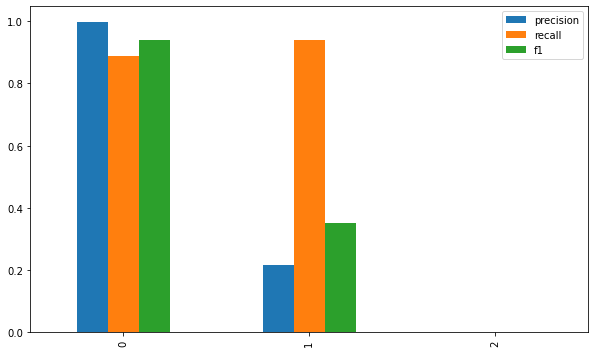

In [40]:
_ = opmet_metrics.plot.bar(y=['precision', 'recall', 'f1'],figsize=(10,6))

We see that precision is good for no rotors, which is to say most of the negative predictions are actually negative, and poor for rotors events, because rotors are deliberately over-predicted.

For recall, we see good performance for bothm which is to say most positive and negatives are correctly classified as proportion of class size. In absolute numbers this is a lot of false positives, but this is small as a proprtion of the number of no rotor event data points.

Unsurprisingly F1 is thus good for no rotor class and not great for positives.